# Hurricane Landing Distribution

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults, pairplot
from sithom.xr import plot_units
from src.constants import IBTRACS_NC, LANDING_DS
from src.data_loading.ibtracs import gom_tcs

plot_defaults()

## Get GOM Landing Dataset

In [3]:
from src.data_loading.ibtracs import make_landing_dataset


ds = make_landing_dataset()

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Starting loop.
Finished loop.
'_landing_list'  0.48934 s 

[98000. 96500.    nan    nan 96100.    nan 98700.    nan 96400. 94600.
 93400.    nan 97900. 97600.    nan    nan    nan    nan 94200. 98000.
 98500. 96700. 97200.    nan 95200.    nan    nan 97200. 95500. 93100.
    nan    nan    nan    nan    nan    nan 98200.    nan    nan    nan
    nan    nan 95000. 97300.    nan    nan 95900. 94200.    nan 96700.
    nan    nan    nan 94000. 94400. 98100. 94900. 96200. 95000.    nan
 93200. 95900. 97000. 97000.    nan 93100.    nan 96300. 98900. 98400.
 98600. 99000. 93700. 94800. 93600. 99000. 94900. 98300. 98400. 94900.
 94600. 95500. 98000. 98700. 96400. 92700. 95000. 91900. 98200.    nan
 98400. 96600. 97500. 97500. 99300. 96100. 98000. 95100.    nan    nan
    nan 92500. 98700. 95800. 98300.    nan    nan 97300. 97400. 97300.
 93900. 97000. 97000.    nan 96500.    nan 97000. 98300. 96200.    nan
 96700. 93100. 98000. 99100. 97900. 97500. 96000.    nan    nan 97800.
    nan 96300. 968

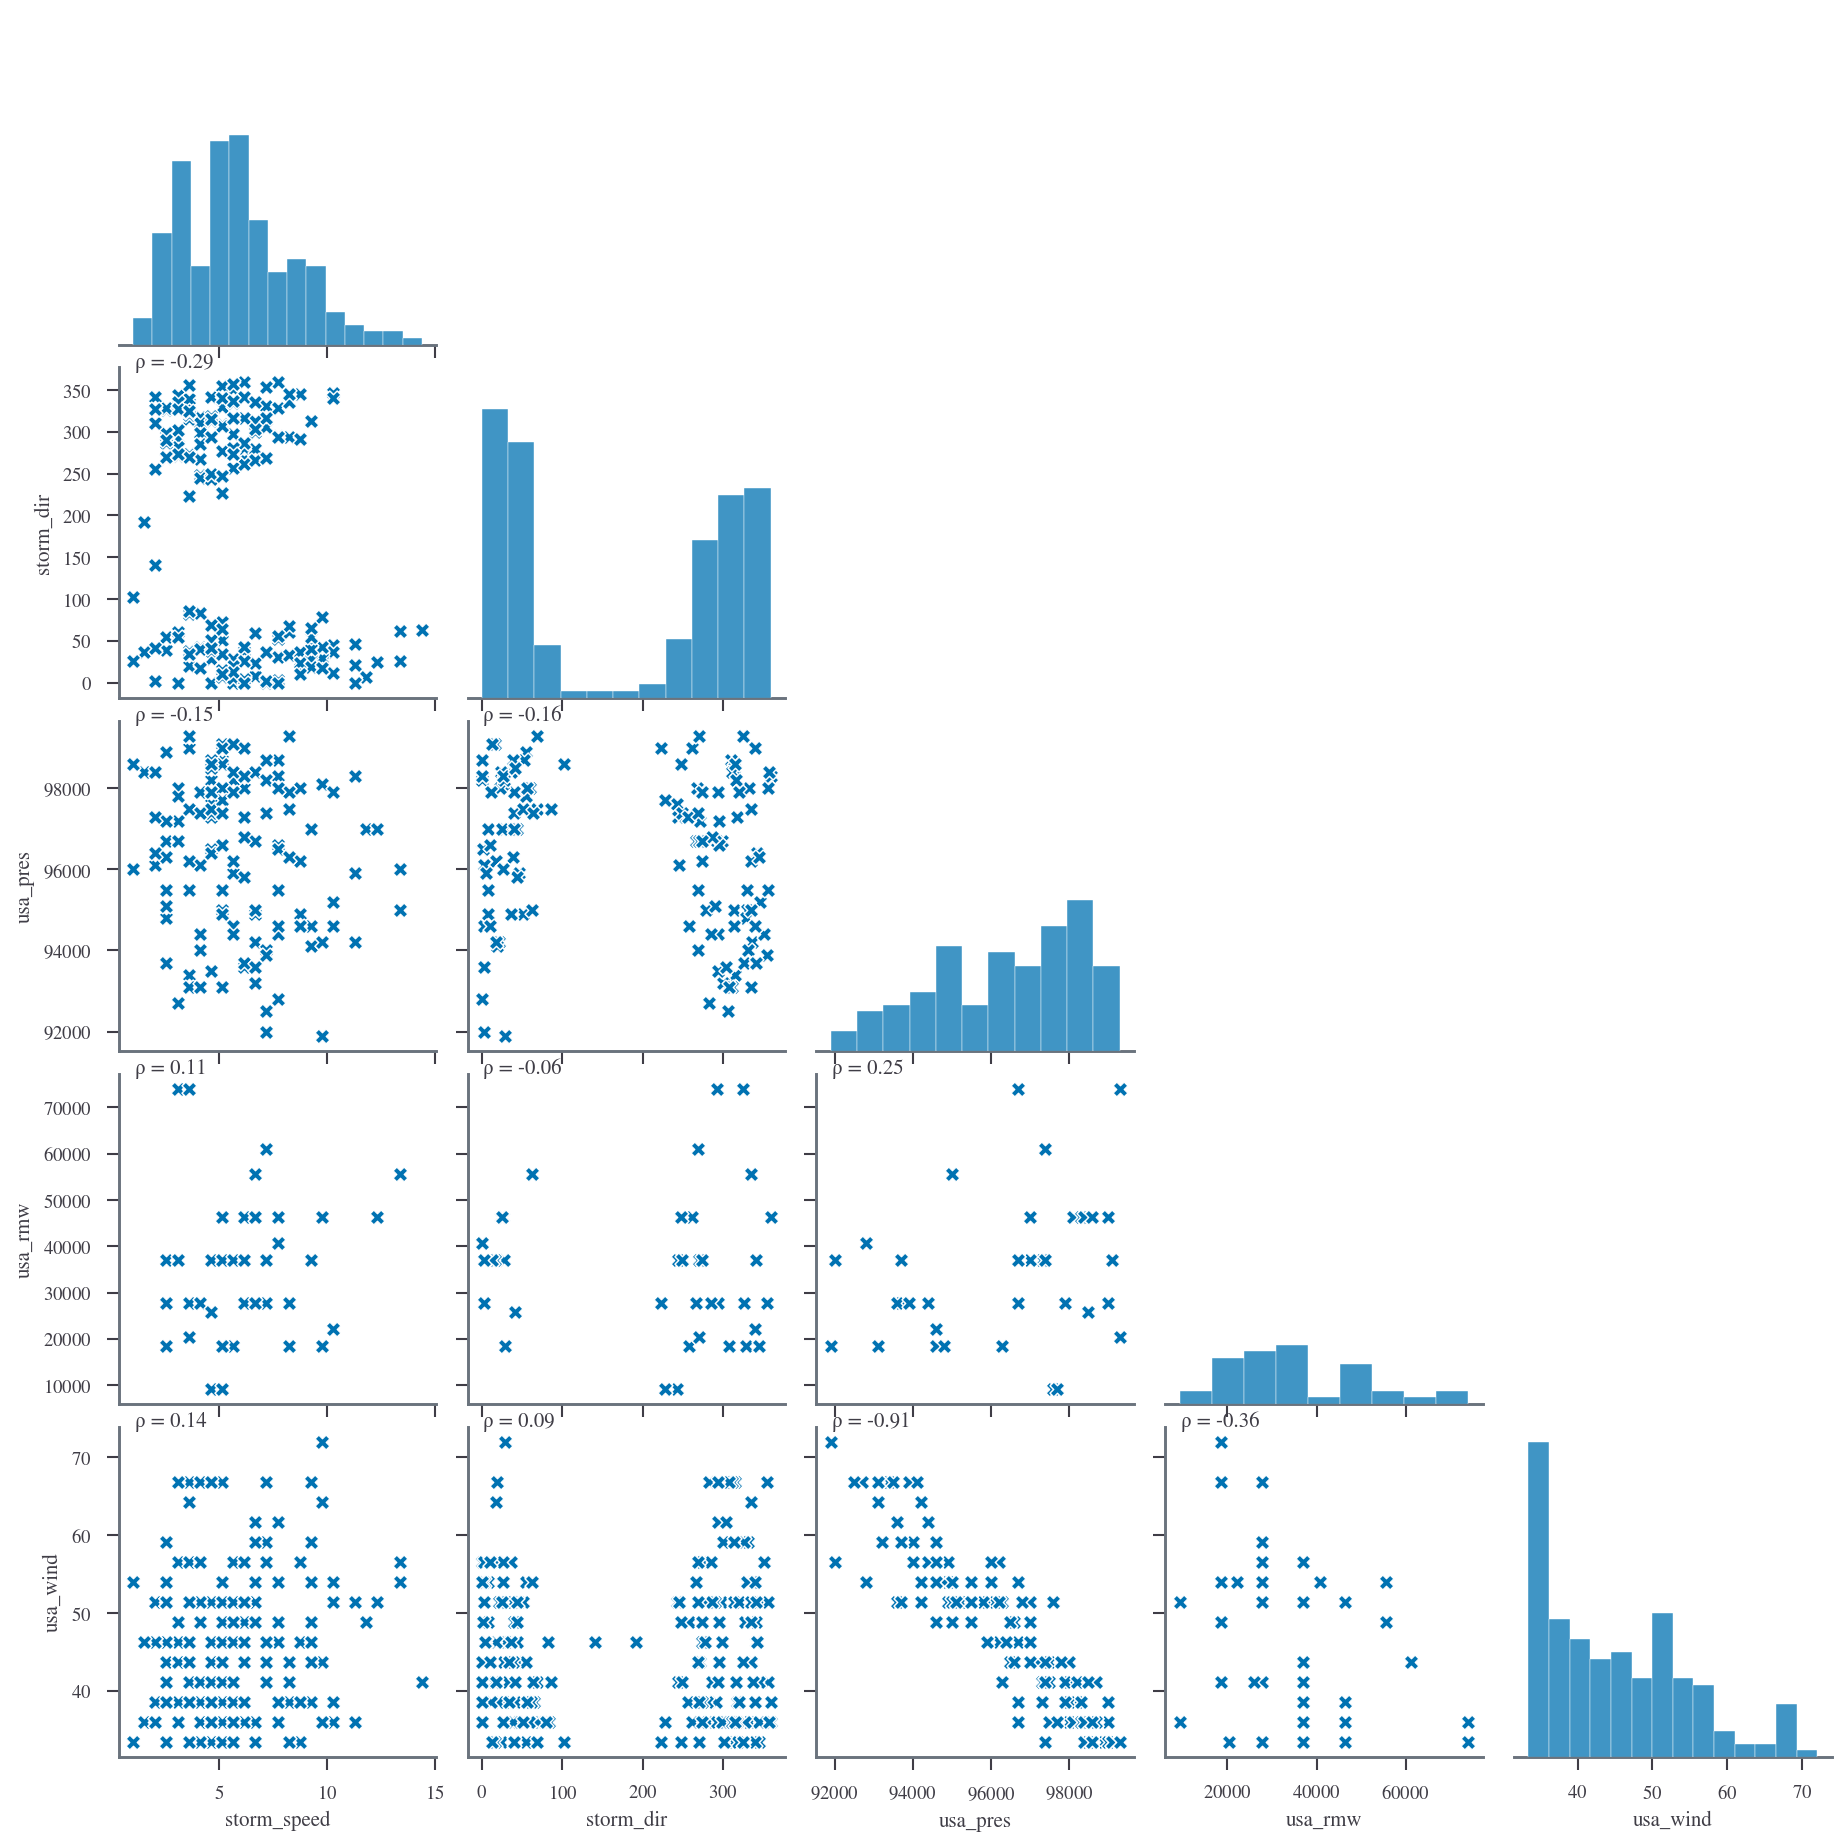

In [14]:
pairplot(
    ds.to_dataframe()[["storm_speed", "storm_dir", "usa_pres", "usa_rmw", "usa_wind"]]
)

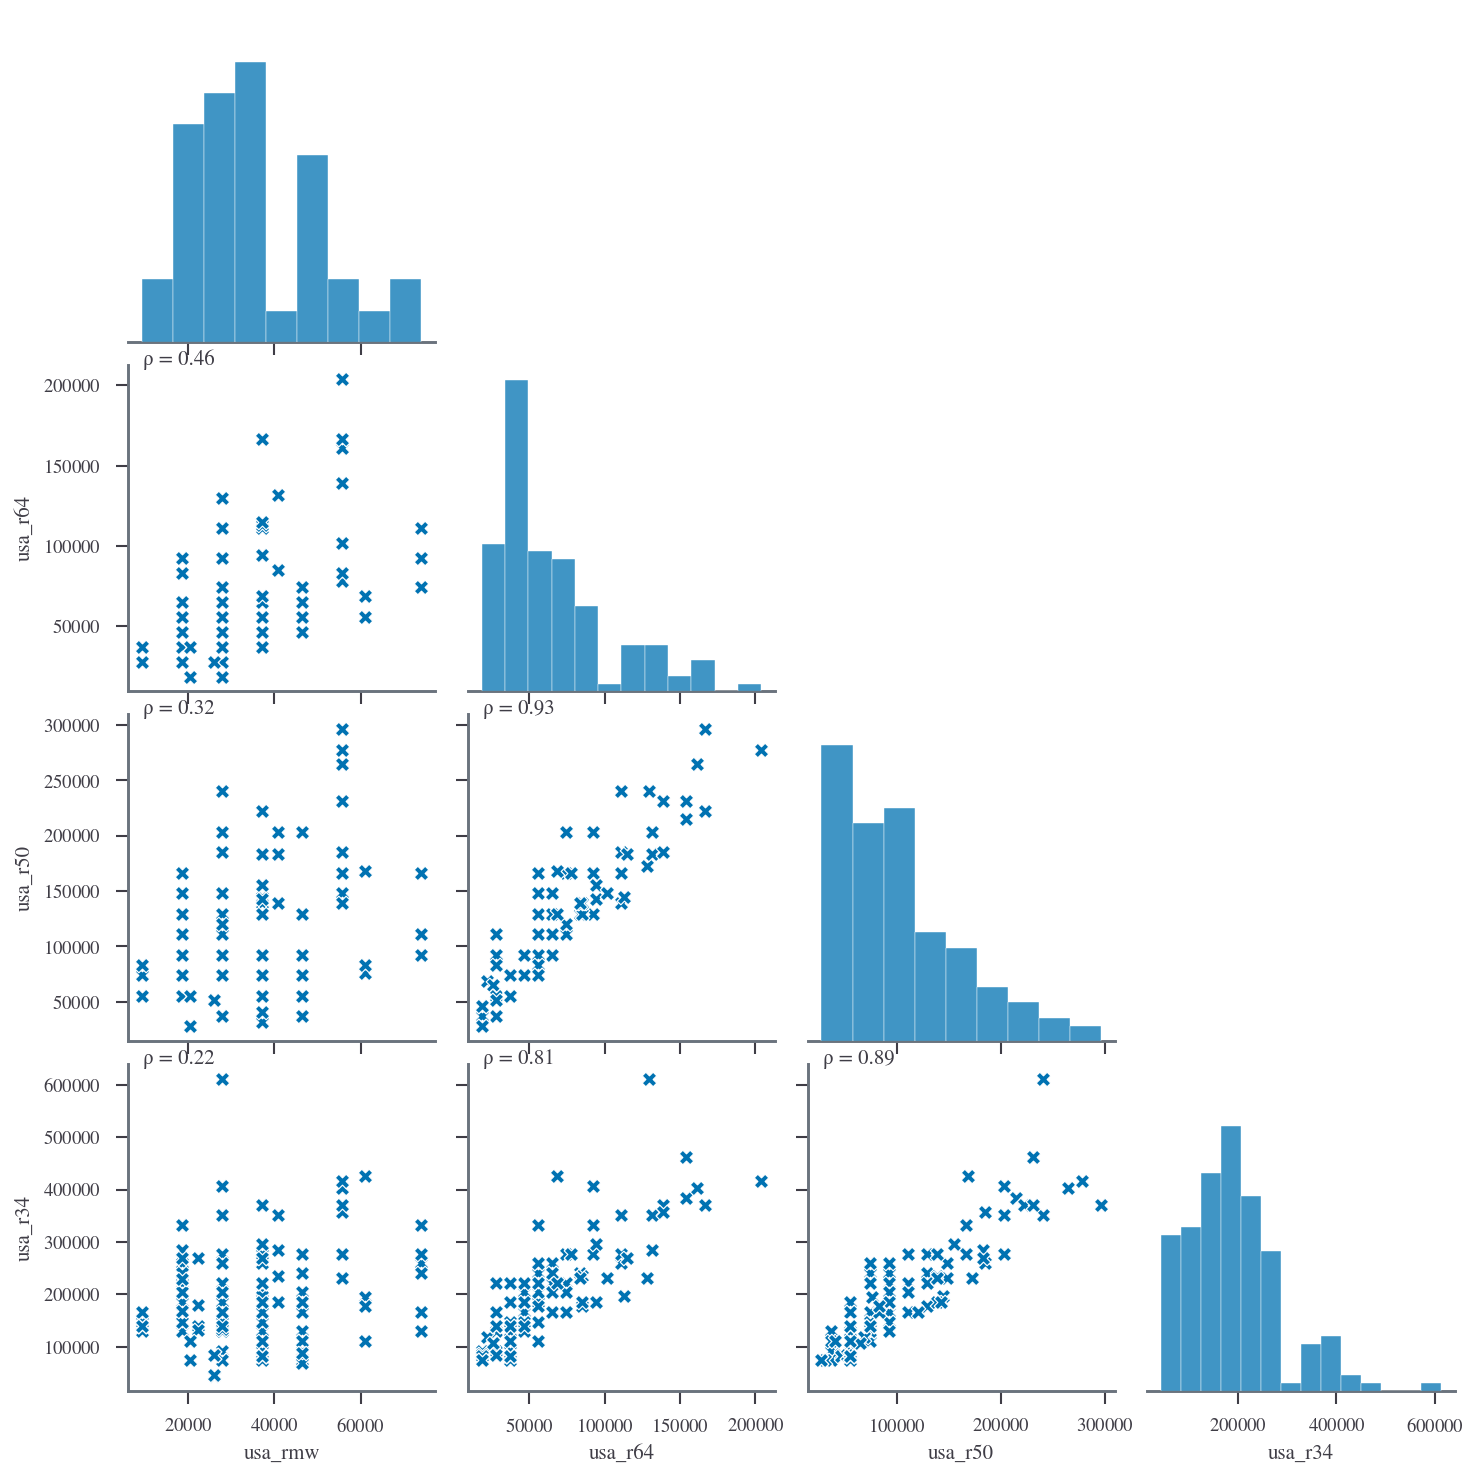

In [28]:
pairplot(ds.to_dataframe()[["usa_rmw", "usa_r64", "usa_r50", "usa_r34"]])

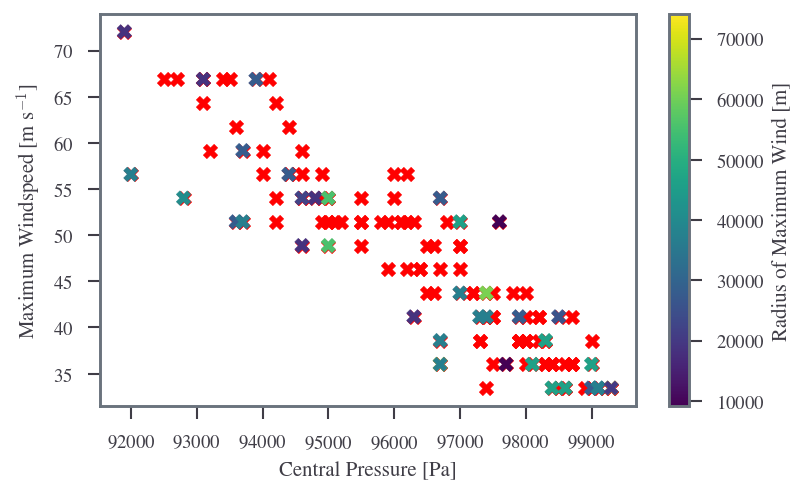

In [19]:
plt.scatter(ds["usa_pres"].values, ds["usa_wind"].values, c="red")

plt.scatter(ds["usa_pres"].values, ds["usa_wind"].values, c=ds["usa_rmw"].values)

plt.ylabel("Maximum Windspeed [m s$^{-1}$]")
plt.xlabel("Central Pressure [Pa]")
plt.colorbar(label="Radius of Maximum Wind [m]")

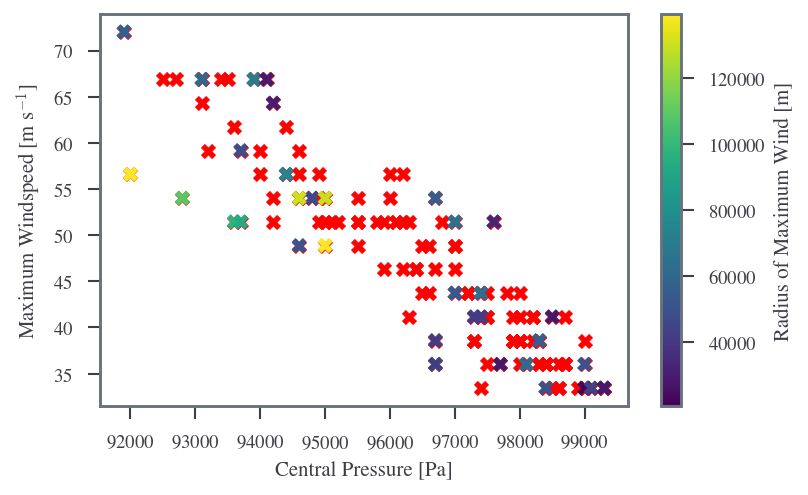

In [21]:
plt.scatter(ds["usa_pres"].values, ds["usa_wind"].values, c="red")

plt.scatter(
    ds["usa_pres"].values,
    ds["usa_wind"].values,
    c=ds["usa_r64"].mean("quadrant").values,
)

plt.ylabel("Maximum Windspeed [m s$^{-1}$]")
plt.xlabel("Central Pressure [Pa]")
plt.colorbar(label="Radius of 64 knot winds [m]")

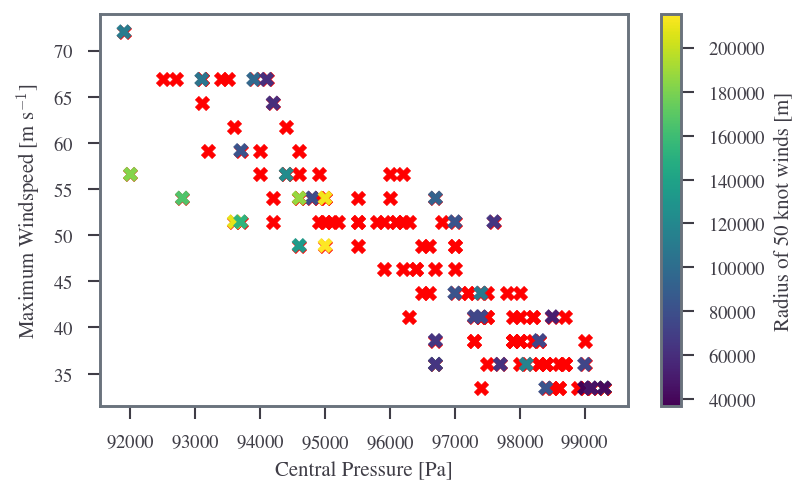

In [23]:
plt.scatter(ds["usa_pres"].values, ds["usa_wind"].values, c="red")

plt.scatter(
    ds["usa_pres"].values,
    ds["usa_wind"].values,
    c=ds["usa_r50"].mean("quadrant").values,
)

plt.ylabel("Maximum Windspeed [m s$^{-1}$]")
plt.xlabel("Central Pressure [Pa]")
plt.colorbar(label="Radius of 50 knot winds [m]")

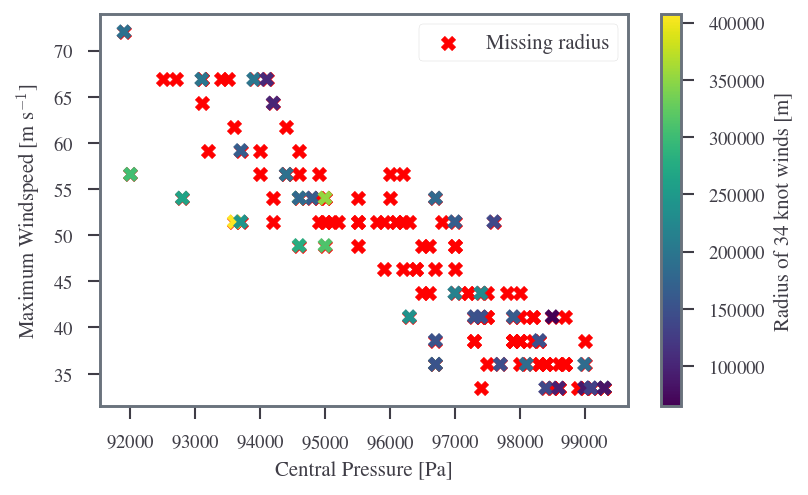

In [27]:
plt.scatter(
    ds["usa_pres"].values, ds["usa_wind"].values, c="red", label="Missing radius"
)

plt.scatter(
    ds["usa_pres"].values,
    ds["usa_wind"].values,
    c=ds["usa_r34"].mean("quadrant").values,
)

plt.ylabel("Maximum Windspeed [m s$^{-1}$]")
plt.xlabel("Central Pressure [Pa]")
plt.colorbar(label="Radius of 34 knot winds [m]")

plt.legend()

In [24]:
ds["usa_r34"]

<xarray.Dataset>
Dimensions:      (time: 192, quadrant: 4)
Coordinates:
    time         (time) datetime64[ns] 1990-08-07T19:00:00.000067072 ... 1903...
    lat          (time) float32 20.9 29.6 28.13 29.93 ... 29.8 29.2 29.3 30.1
    lon          (time) float32 -97.0 -83.4 -96.57 -85.67 ... -95.0 -94.7 -85.6
Dimensions without coordinates: quadrant
Data variables: (12/16)
    nature       (time) |S2 b'TS' b'TS' b'TS' b'TS' ... b'TS' b'TS' b'TS' b'TS'
    basin        (time) |S2 b'NA' b'NA' b'NA' b'NA' ... b'NA' b'NA' b'NA' b'NA'
    subbasin     (time) |S2 b'GM' b'GM' b'GM' b'GM' ... b'GM' b'GM' b'GM' b'GM'
    name         (time) |S128 b'DIANA' b'NOT_NAMED' ... b'IKE' b'NOT_NAMED'
    storm_speed  (time) float32 6.173 4.63 2.572 6.173 ... 6.173 6.688 5.659
    storm_dir    (time) float32 267.0 0.0 286.0 37.0 ... 10.0 0.0 335.0 337.0
    ...           ...
    usa_poci     (time) float32 nan nan nan nan nan ... nan nan 1.007e+05 nan
    usa_lat      (time) float32 20.9 29.6 28.2 30.1 30.2 ... 29.8 29.2 29.3 30.1
    usa_r34      (time, quadrant) float32 nan nan nan nan ... nan nan nan nan
    usa_r50      (time, quadrant) float32 nan nan nan nan ... nan nan nan nan
    usa_r64      (time, quadrant) float32 nan nan nan nan ... nan nan nan nan
    usa_record   (time) |S1 b'L' b'L' b'L' b'L' b'L' ... b'L' b'L' b'L' b'L'
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

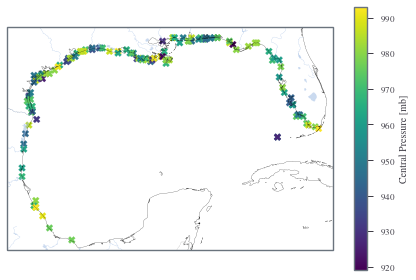

In [5]:
from src.conversions import pascal_to_millibar
from src.plot.map import map_axes

plot_defaults()
map_axes()

plt.scatter(
    ds.lon.values, ds.lat.values, c=pascal_to_millibar(ds.usa_pres.values)
)  # , vmin=900e2, vmax=1000e2)
plt.colorbar(label="Central Pressure [mb]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

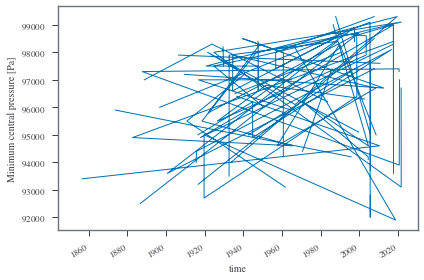

In [6]:
ds.usa_pres.plot(x="time")

## Time Distribution

Text(0.5, 0, 'Year')

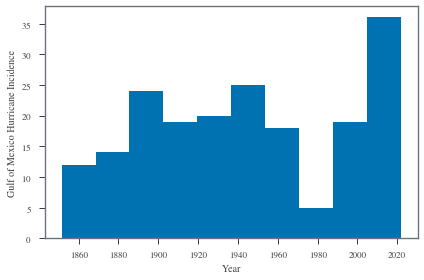

In [7]:
plt.hist(ds.time.values)
plt.ylabel("Gulf of Mexico Hurricane Incidence")
plt.xlabel("Year")

## ExpWeibull 

((0.12927641302779486, 18.107857648801374, 906.1485639982502, 82.62831955551712),)


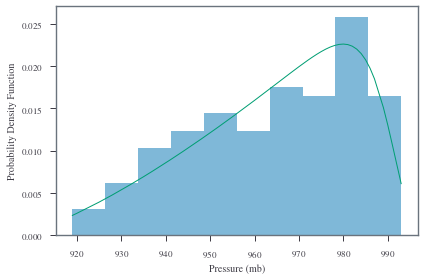

(0.12927641302779486, 18.107857648801374, 906.1485639982502, 82.62831955551712)


array([950.64697473, 982.5066718 , 984.29348198, 981.44925326,
       962.18190092, 954.53036007, 937.97311466, 969.86063627,
       989.38599406, 972.21610549, 944.19448562, 987.29126647,
       956.8860878 , 911.96700167, 966.04294963, 984.4855554 ,
       978.8520571 , 978.40534054, 975.8059845 , 951.5345638 ,
       969.65577547, 974.49960866, 964.65348582, 987.09587649,
       975.23061903, 975.45367393, 978.85472434, 966.05532167,
       987.41586438, 937.82764007, 975.18431463, 983.33900548,
       979.1604514 , 964.79101035, 942.41379112, 979.08868473,
       937.3985758 , 953.61194627, 976.13417335, 966.87373384,
       943.63506685, 955.2035451 , 970.21649947, 983.45971739,
       993.97440709, 942.22364117, 937.35872931, 969.95602652,
       927.77075461, 983.25890243, 961.94725051, 963.09529716,
       932.75186177, 965.78879105, 985.04451785, 970.4595218 ,
       975.60814892, 943.22345994, 954.84049274, 942.72626669,
       978.05155135, 961.319343  , 971.03363279, 946.87

In [8]:
from scipy import stats
import matplotlib.pyplot as plt

data = pascal_to_millibar(ds.usa_pres.values)

data = data[np.argsort(data)]

data = data[~np.isnan(data)]

_ = plt.hist(
    data, alpha=0.5, density=True
)  # , #bins=np.linspace(0, 16, 33), alpha=0.5)
param = (stats.exponweib.fit(data),)  # 1, 1, scale=2, loc=0)
print(param)
if isinstance(param[0], tuple):
    param = param[0]
plt.plot(data, stats.exponweib(*param).pdf(data))  # 1, 1, scale=2, loc=0)))

plt.xlabel("Pressure (mb)")
plt.ylabel("Probability Density Function")
plt.show()
print(param)
stats.exponweib(*param).rvs(size=100)

## Weibull_Min

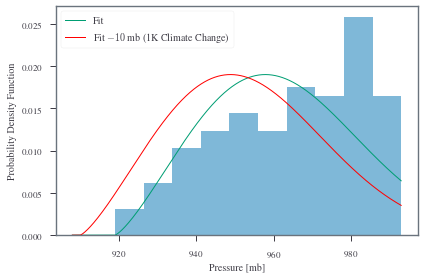

(2.3012174659759888, 918.9990711901514, 49.81859842590945)


In [9]:
from scipy import stats
import matplotlib.pyplot as plt

data = pascal_to_millibar(ds.usa_pres.values)
data = data[np.argsort(data)]
data = data[~np.isnan(data)]

_ = plt.hist(
    data, alpha=0.5, density=True
)  # , #bins=np.linspace(0, 16, 33), alpha=0.5)

param = stats.weibull_min.fit(data)  # ,# 1, 1, scale=2, loc=0)
if isinstance(param[0], tuple):
    param = param[0]

new_x = np.linspace(908, 993, num=1000)

plt.plot(
    new_x, stats.weibull_min(*param).pdf(new_x), label="Fit"
)  # 1, 1, scale=2, loc=0)))

wm = stats.weibull_min(*(2.3012174659759888, 909.9990711901514, 49.81859842590945))
plt.plot(new_x, wm.pdf(new_x), color="red", label="Fit $-10$ mb (1K Climate Change)")

plt.xlabel("Pressure [mb]")
plt.ylabel("Probability Density Function")
plt.legend()

plt.show()

print(param)

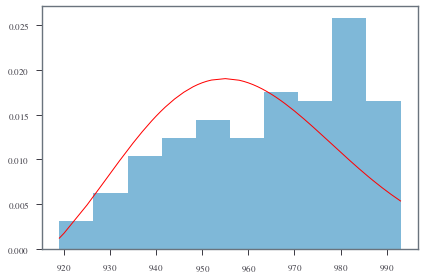

In [10]:
_ = plt.hist(
    data, alpha=0.5, density=True
)  # , #bins=np.linspace(0, 16, 33), alpha=0.5)
wm = stats.weibull_min(*(2.3012174659759888, 915.9990711901514, 49.81859842590945))
plt.plot(data, wm.pdf(data), color="red", label="Fit -5mb")
dist2 = wm.rvs(size=int(1e6))
dist2 = dist2[dist2 < 980]

In [11]:
dist = stats.weibull_min(*param).rvs(size=int(1e6))

In [12]:
dist[dist < 980].shape[0] / 1e6

0.797391

In [13]:
dist[dist < 990].shape[0] / 1e6

0.896196

In [14]:
years = dist[dist < 990].shape[0] / 0.06  # how many years

In [15]:
"{:.3e} years".format(years)

'1.494e+07 years'

In [16]:
stats.weibull_min(*param).pdf(data)

array([3.17954010e-08, 2.85991940e-04, 2.91870344e-03, 4.21322550e-03,
       4.88830154e-03, 6.97860972e-03, 6.97860972e-03, 6.97860972e-03,
       7.68562257e-03, 9.09590708e-03, 9.79318050e-03, 1.04813647e-02,
       1.04813647e-02, 1.11576918e-02, 1.11576918e-02, 1.24641725e-02,
       1.30892839e-02, 1.30892839e-02, 1.36924648e-02, 1.42714828e-02,
       1.42714828e-02, 1.42714828e-02, 1.53487478e-02, 1.53487478e-02,
       1.53487478e-02, 1.63059494e-02, 1.63059494e-02, 1.63059494e-02,
       1.63059494e-02, 1.63059494e-02, 1.71304017e-02, 1.74896042e-02,
       1.74896042e-02, 1.74896042e-02, 1.78120719e-02, 1.78120719e-02,
       1.78120719e-02, 1.78120719e-02, 1.78120719e-02, 1.80969915e-02,
       1.83437305e-02, 1.88512825e-02, 1.88512825e-02, 1.88512825e-02,
       1.88512825e-02, 1.90099340e-02, 1.89869506e-02, 1.89869506e-02,
       1.89271881e-02, 1.89271881e-02, 1.88315734e-02, 1.88315734e-02,
       1.87011785e-02, 1.87011785e-02, 1.87011785e-02, 1.85372111e-02,
      

## Modelled relationship

/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


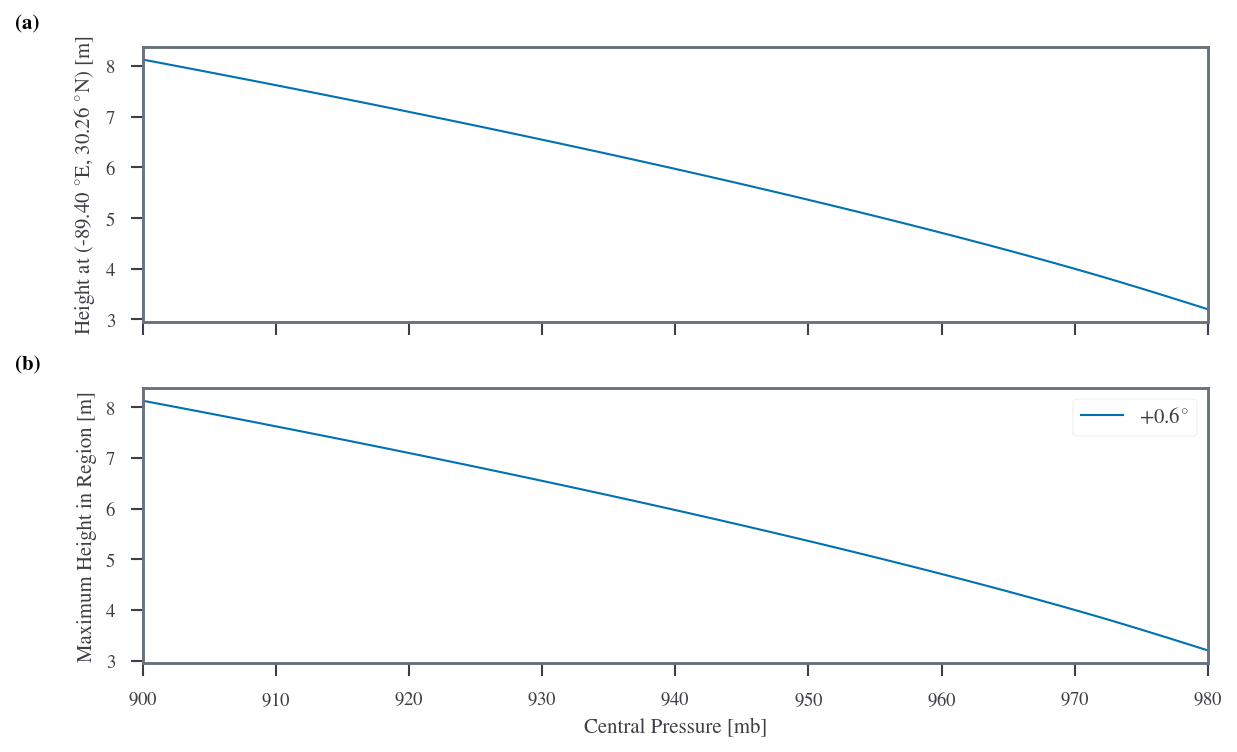

In [17]:
plot_defaults()
import os
from typing import Tuple, List
from src.conversions import millibar_to_pascal, pascal_to_millibar
from sithom.plot import get_dim, label_subplots
from adcircpy.outputs import Maxele
from src.constants import DATA_PATH, NO_BBOX
from GPy.models import GPRegression


angle_list = millibar_to_pascal(np.linspace(900, 980, num=100))
main_folder = os.path.join(DATA_PATH, "kat_pcf")


@np.vectorize
def indices_in_bbox(lon, lat):
    return (
        lon > NO_BBOX.lon[0]
        and lon < NO_BBOX.lon[1]
        and lat > NO_BBOX.lat[0]
        and lat < NO_BBOX.lat[1]
    )


def get(prefix="a") -> Tuple[List[float], List[float], List[float]]:
    height_set_list = []
    height_var_list = []
    working_angle_list = []
    for angle in angle_list:
        folder = os.path.join(main_folder, prefix + "{:.3f}".format(angle) + "_kat_pc")
        if os.path.exists(folder):
            path = os.path.join(folder, "maxele.63.nc")
            if os.path.exists(path):
                maxele = Maxele(path, crs="EPSG:4326")
                indices = indices_in_bbox(maxele.x, maxele.y)
                index_var = (-maxele.values[indices]).argmin()
                index_set = 27
                height_set_list.append(maxele.values[indices][index_set])
                height_var_list.append(maxele.values[indices][index_var])
                working_angle_list.append(pascal_to_millibar(angle))
    return working_angle_list, height_set_list, height_var_list


fig, axs = plt.subplots(2, 1, sharex=True, figsize=get_dim(fraction_of_line_width=1.5))
axs[0].set_ylabel("Height at (-89.40 $^{\circ}$E, 30.26 $^{\circ}$N) [m]")
axs[1].set_ylabel("Maximum Height in Region [m]")
axs[1].set_xlabel("Central Pressure [mb]")
axs[0].set_xlim([900, 980])
label_subplots(axs, override="outside")

for prefix, label in [
    ("b", "+0.6$^{\circ}$"),
]:
    al, hsl, hvl = get(prefix=prefix)
    axs[0].plot(al, hsl, label=label)
    axs[1].plot(al, hvl, label=label)

plt.legend()
plt.show()

Text(0, 0.5, 'Height [m]')

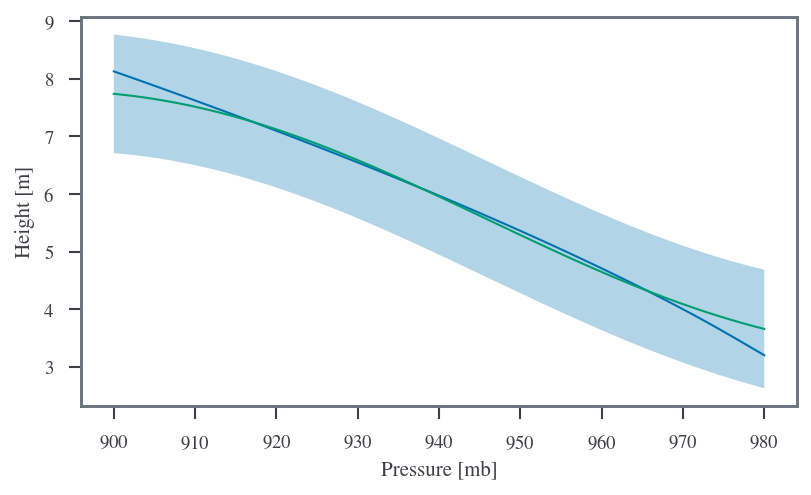

In [18]:
x = np.array(al)
y = np.array(hsl)
y = y[x.argsort()]
x = x[x.argsort()]
y = y.reshape(len(x), 1)
x = x.reshape(len(x), 1)


def xprime(xval):
    return (xval - 940) / 50


def xreal(xval):
    return xval * 50 + 940


def yprime(xval):
    return (xval - 5) / 3


def yreal(xval):
    return xval * 3 + 5


assert 1.0 == yreal(yprime(1.0))
assert 1.0 == xprime(xreal(1.0))


model_gpy = GPRegression(xprime(x), yprime(y))
y_pred, var = model_gpy.predict(xprime(x))
y_pred = yreal(y_pred)
std = np.sqrt(var)
plt.plot(x, y)
plt.plot(x, y_pred)
plt.fill_between(
    np.ravel(x),
    np.ravel(y_pred - std),
    np.ravel(y_pred + std),
    alpha=0.3,
)
plt.xlabel("Pressure [mb]")
plt.ylabel("Height [m]")
# plt.xlim(15e3, 47e3)

# plt.plot(al, hsl)

In [19]:
?GPRegression

In [20]:
from GPy.kern.src.add import Add

?Add

(900.0, 980.0)

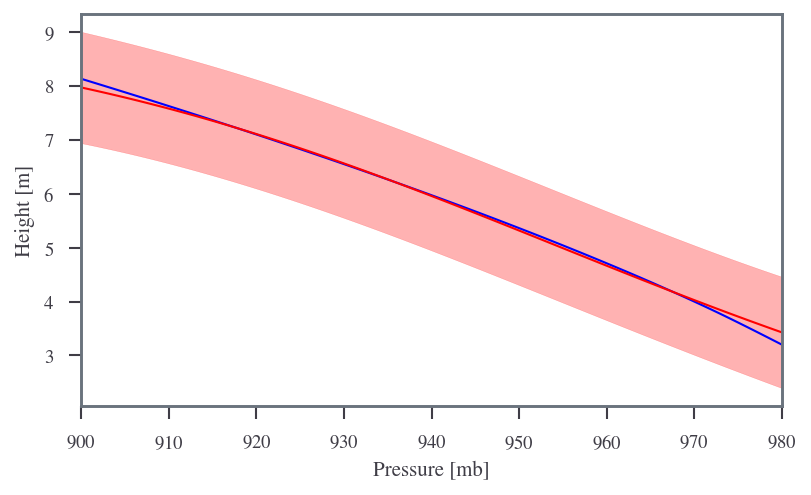

In [21]:
from GPy.kern import Linear, RBF
from GPy.kern.src.add import Add

x = np.array(al)
y = np.array(hsl)
y = y[x.argsort()]
x = x[x.argsort()]
y = y.reshape(len(x), 1)
x = x.reshape(len(x), 1)


def xprime(xval):
    return (xval - 940) / 50


def xreal(xval):
    return xval * 50 + 940


def yprime(xval):
    return (xval - 5) / 3


def yreal(xval):
    return xval * 3 + 5


assert 1.0 == yreal(yprime(1.0))
assert 1.0 == xprime(xreal(1.0))


model_gpy = GPRegression(xprime(x), yprime(y), Add([RBF(1), Linear(1)]))
model_gpy.optimize()
y_pred, var = model_gpy.predict(xprime(x))
y_pred = yreal(y_pred)
std = np.sqrt(var)
plt.plot(x, y, color="blue")
plt.plot(x, y_pred, color="red")
plt.fill_between(
    np.ravel(x),
    np.ravel(y_pred - std),
    np.ravel(y_pred + std),
    alpha=0.3,
    color="red",
)
plt.xlabel("Pressure [mb]")
plt.ylabel("Height [m]")
plt.xlim(900, 980)

# plt.plot(al, hsl)

(900.0, 980.0)

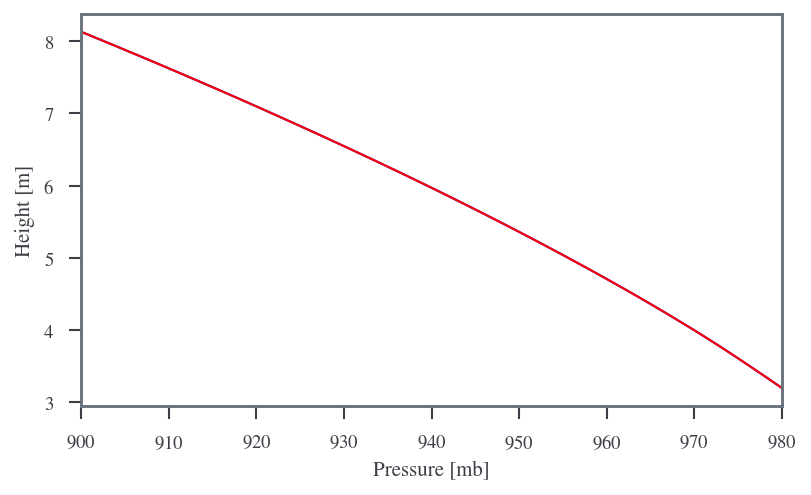

In [41]:
from GPy.kern.src.poly import Poly
from GPy.kern.src.sde_matern import Matern32, Matern52
from GPy.kern.src.add import Add

x = np.array(al)
y = np.array(hsl)
y = y[x.argsort()]
x = x[x.argsort()]
y = y.reshape(len(x), 1)
x = x.reshape(len(x), 1)


def xprime(xval):
    return (xval - 940) / 50


def xreal(xval):
    return xval * 50 + 940


def yprime(xval):
    return (xval - 5) / 3


def yreal(xval):
    return xval * 3 + 5


assert 1.0 == yreal(yprime(1.0))
assert 1.0 == xprime(xreal(1.0))


model_gpy = GPRegression(xprime(x), yprime(y), Add([Matern52(1), Linear(1)]))
model_gpy.optimize()
y_pred, var = model_gpy.predict(xprime(x))
y_pred = yreal(y_pred)
std = np.sqrt(var) * 3
plt.plot(x, y, color="blue")
plt.plot(x, y_pred, color="red")
plt.fill_between(
    np.ravel(x),
    np.ravel(y_pred - std),
    np.ravel(y_pred + std),
    alpha=0.3,
    color="red",
)
plt.xlabel("Pressure [mb]")
plt.ylabel("Height [m]")
plt.xlim(900, 980)

# plt.plot(al, hsl)

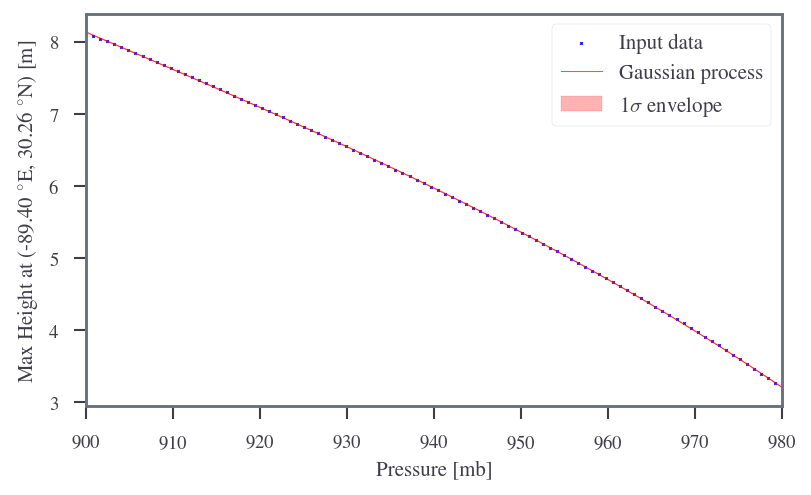

In [43]:
from GPy.kern.src.poly import Poly
from GPy.kern.src.sde_matern import Matern32, Matern52
from GPy.kern.src.add import Add

x = np.array(al)
y = np.array(hsl)
y = y[x.argsort()]
x = x[x.argsort()]
y = y.reshape(len(x), 1)
x = x.reshape(len(x), 1)


def xprime(xval):
    return (xval - 940) / 50


def xreal(xval):
    return xval * 50 + 940


def yprime(xval):
    return (xval - 5) / 3


def yreal(xval):
    return xval * 3 + 5


assert 1.0 == yreal(yprime(1.0))
assert 1.0 == xprime(xreal(1.0))


model_gpy = GPRegression(xprime(x), yprime(y), Add([Linear(1), Poly(1, order=3)]))
model_gpy.optimize()
y_pred, var = model_gpy.predict(xprime(x))
y_pred = yreal(y_pred)
std = np.sqrt(var) * 3
plt.scatter(x, y, color="blue", label="Input data", s=2)
plt.plot(x, y_pred, color="red", label="Gaussian process", linewidth=0.5, alpha=0.7)
plt.fill_between(
    np.ravel(x),
    np.ravel(y_pred - std),
    np.ravel(y_pred + std),
    alpha=0.3,
    color="red",
    label="1$\sigma$ envelope",
)
plt.xlabel("Pressure [mb]")
plt.ylabel("Max Height at (-89.40 $^{\circ}$E, 30.26 $^{\circ}$N) [m]")
plt.xlim(900, 980)
plt.legend()

# plt.plot(al, hsl)

In [24]:
# y_pred, var = model_gpy.predict(xprime(dist.reshape(len(dist), 1)))
# y_pred = yreal(y_pred)


@np.vectorize
def predict(vals: float):
    yp, var = model_gpy.predict(np.array(xprime(vals)).reshape(1, 1))
    return yreal(yp), yreal(np.sqrt(var))


ypred, yvar = predict(dist[dist < 980][: int(1e5)])

In [25]:
ypred2, yvar2 = predict(dist2[: int(1e5)])

In [26]:
dist[dist < 980].shape[0] / dist.shape[0]

0.797391

In [27]:
0.796554 * 0.06

0.04779324

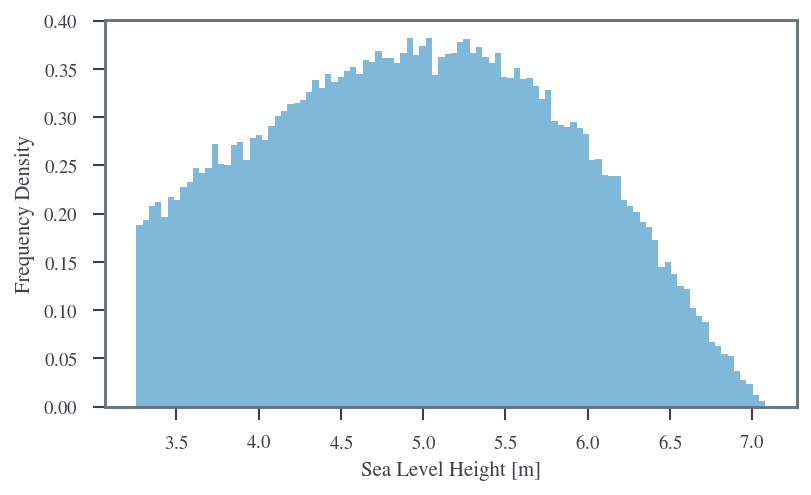

In [28]:
plt.xlabel("Sea Level Height [m]")
plt.ylabel("Frequency Density")
x, y, _ = plt.hist(ypred, density=True, alpha=0.5, bins=100)

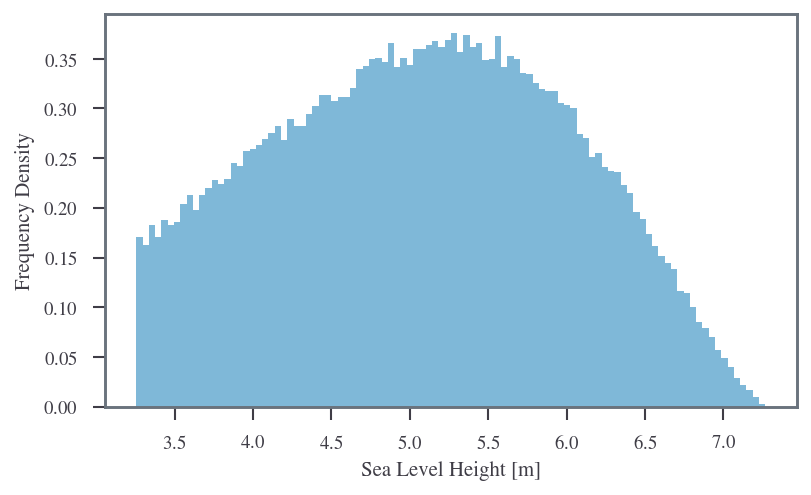

In [29]:
plt.xlabel("Sea Level Height [m]")
plt.ylabel("Frequency Density")
x2, y2, _ = plt.hist(ypred2, density=True, alpha=0.5, bins=100)

In [30]:
np.sum(x * (y[1:] - y[:-1]))

0.9999999999999999

In [33]:
x

array([0.18821977, 0.1934481 , 0.20834883, 0.21174724, 0.19658509,
       0.21671415, 0.21357716, 0.22795506, 0.23292197, 0.24703845,
       0.24181012, 0.24703845, 0.27213442, 0.25174394, 0.25017545,
       0.27108875, 0.27448717, 0.25540377, 0.27866983, 0.28102258,
       0.27631708, 0.2909564 , 0.30089022, 0.30611854, 0.31369962,
       0.31422245, 0.3181437 , 0.3262476 , 0.33801134, 0.33043027,
       0.34454675, 0.33644284, 0.34140975, 0.34794516, 0.35238924,
       0.34480816, 0.35944748, 0.35735615, 0.36859705, 0.36075456,
       0.36127739, 0.35631048, 0.36598289, 0.38192929, 0.36441439,
       0.3740868 , 0.38166787, 0.34402392, 0.36232306, 0.36519864,
       0.3662443 , 0.37800804, 0.3806222 , 0.36676714, 0.37225688,
       0.36206164, 0.35578765, 0.36676714, 0.34167117, 0.34088692,
       0.35108216, 0.339057  , 0.34088692, 0.33173735, 0.31840511,
       0.32807752, 0.29644614, 0.29200206, 0.28991073, 0.29540047,
       0.28886507, 0.28232966, 0.25592661, 0.25697227, 0.24050

Text(0.5, 0, 'Tropical Cyclone Sea Surface Height [m]')

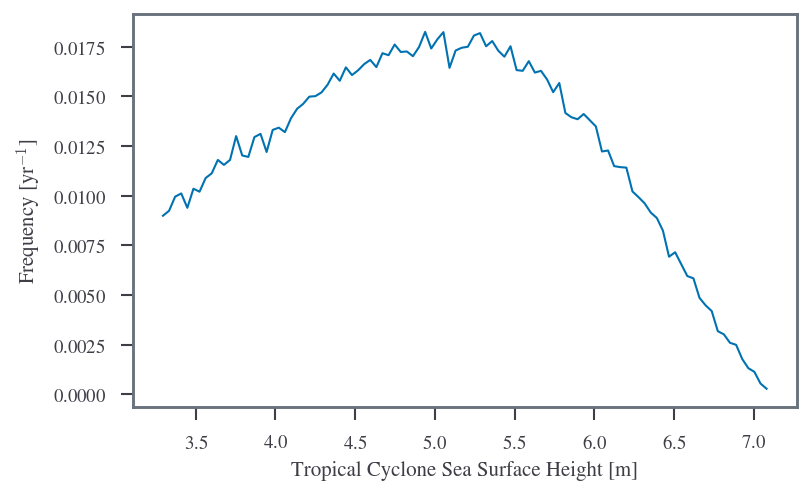

In [34]:
plt.plot(y[1:], x * 0.796554 * 0.06)
plt.ylabel("Frequency [yr$^{-1}$]")
plt.xlabel("Tropical Cyclone Sea Surface Height [m]")

In [ ]:
plt.plot(y[1:], x[0] * 0.796554 * 0.06)
plt.ylabel("Frequency [yr$^{-1}$]")
plt.xlabel("Tropical Cyclone Sea Surface Height [m]")

In [ ]:
y[1:][::-1]

In [ ]:
dist2.shape[0] / 1e6

In [ ]:
xp1 = x * (y[1:] - y[:-1])
xc = 1 / np.cumsum(xp1[::-1] * 0.06)[::-1]
xp2 = x2 * (y2[1:] - y2[:-1])
xc2 = 1 / np.cumsum(xp2[::-1] * 0.06)[::-1]

In [ ]:
xc.shape

In [ ]:
xc2.shape

In [ ]:
x2.shape

In [ ]:
y2.shape

In [ ]:
xc.shape

In [ ]:
y2.shape

In [ ]:
dist2.shape

In [ ]:
plt.semilogx(
    xc,
    y[1:],
    label="IBTrACS",
    linewidth=0.5,
    color="green",
)
plt.semilogx(
    xc2, y2[1:], label="IBTrACS - 10 mb (1K Climate Change)", linewidth=0.5, color="red"
)
plt.ylabel("Height of Storm Surge [m]")
plt.xlabel("Return Period [years]")
plt.xlim([15, 4e3])
plt.legend()

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=get_dim(ratio=1.5))


data = pascal_to_millibar(ds.usa_pres.values)
data = data[np.argsort(data)]
data = data[~np.isnan(data)]

_ = axs[0].hist(
    data, alpha=0.5, density=True
)  # , #bins=np.linspace(0, 16, 33), alpha=0.5)

param = stats.weibull_min.fit(data)  # ,# 1, 1, scale=2, loc=0)
if isinstance(param[0], tuple):
    param = param[0]

new_x = np.linspace(908, 993, num=1000)

axs[0].plot(
    new_x, stats.weibull_min(*param).pdf(new_x), label="IBTrACS"
)  # 1, 1, scale=2, loc=0)))

wm = stats.weibull_min(*(2.3012174659759888, 909.9990711901514, 49.81859842590945))
axs[0].plot(
    new_x, wm.pdf(new_x), color="red", label="IBTrACS $-10$ mb (1K Climate Change)"
)
axs[0].set_xlim(900, 980)

axs[0].set_xlabel("Pressure [mb]")
axs[0].set_ylabel("Probability Density Function")

axs[0].legend()

from GPy.kern.src.poly import Poly
from GPy.kern.src.sde_matern import Matern32, Matern52
from GPy.kern.src.add import Add

x1 = np.array(al)
y1 = np.array(hsl)
y1 = y[x1.argsort()]
x1 = x1[x1.argsort()]
y1 = y1.reshape(len(x1), 1)
x1 = x.reshape(len(x1), 1)


def xprime(xval):
    return (xval - 940) / 50


def xreal(xval):
    return xval * 50 + 940


def yprime(xval):
    return (xval - 5) / 3


def yreal(xval):
    return xval * 3 + 5


# check inversibility
assert 1.0 == yreal(yprime(1.0))
assert 1.0 == xprime(xreal(1.0))


model_gpy = GPRegression(xprime(x1), yprime(y1), Add([Linear(1), Poly(1, order=3)]))
y_pred, var = model_gpy.predict(xprime(x1))
y_pred = yreal(y_pred)
std = np.sqrt(var)
axs[1].scatter(x1, y1, color="blue", label="Input data", s=2)
axs[1].plot(
    x1, y_pred, color="orange", label="Gaussian process", linewidth=0.5, alpha=0.8
)
axs[1].fill_between(
    np.ravel(x1),
    np.ravel(y_pred - std),
    np.ravel(y_pred + std),
    alpha=0.2,
    color="orange",
    label="1$\sigma$ envelope",
)
axs[1].set_xlabel("Pressure [mb]")
axs[1].set_ylabel("Height of Storm Surge [m]")
axs[1].set_xlim(900, 980)
plt.legend()

# plt.plot(al, hsl)

label_subplots(axs, override="outside")
axs[2].semilogx(
    xc,
    y[1:],
    label="IBTrACS",
    linewidth=0.5,
    color="green",
)
axs[2].semilogx(
    xc2, y2[1:], label="IBTrACS - 10 mb (1K Climate Change)", linewidth=0.5, color="red"
)
axs[2].set_ylabel("Height of Storm Surge [m]")
axs[2].set_xlabel("Return Period [years]")
axs[2].set_xlim([15, 4e3])
plt.legend()

In [ ]:
xc2 > xc

In [ ]:
param = stats.weibull_min.fit(data)
param

In [ ]:
stats.weibull_min(*param).pdf(data)

In [ ]:
stats.exponweib(*param).rvs(size=100)

In [ ]:
?stats.exponweib

In [ ]:
?plt.hist

In [ ]:
?stats.exponweib.fit

In [ ]:
from src.conversions import pascal_to_millibar

plt.hist(pascal_to_millibar(ds.usa_pres.values) - 5)

In [ ]:
from src.conversions import pascal_to_millibar
from src.plot.map import map_axes

plot_defaults()
map_axes()

plt.scatter(
    ds.lon.values, ds.lat.values, c=ds.usa_pres.values
)  # , vmin=900e2, vmax=1000e2)
plt.colorbar(label="Central Pressure [Pa]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [ ]:
?map_axes

In [ ]:
map_axes()
plot_defaults()
plt.scatter(ds.lon.values, ds.lat.values)
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")
plt.gca()

In [ ]:
plot_defaults()
map_axes()
from src.conversions import pascal_to_millibar

plt.scatter(
    ds.lon.values, ds.lat.values, c=ds.usa_pres.values
)  # , vmin=900e2, vmax=1000e2)
plt.colorbar(label="Central Pressure [Pa]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [ ]:
plot_defaults()
map_axes()
from src.conversions import pascal_to_millibar

plt.scatter(ds.lon.values, ds.lat.values, c=ds.usa_wind.values)
plt.colorbar(label="Maximum Wind Speed [m s$^{-1}$]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [ ]:
plot_defaults()
map_axes()
from src.conversions import pascal_to_millibar

plt.scatter(ds.lon.values, ds.lat.values, c=ds.usa_rmw.values)
plt.colorbar(label="Maximum Wind Speed Radius [m]")
plt.xlabel("Longitude [$^{\circ}$E]")
plt.ylabel("Latitude [$^{\circ}$N]")

In [ ]:
plot_defaults()
plt.scatter(ds.usa_pres.values / 1e2, ds.usa_rmw.values / 1e3, c=ds.usa_wind.values)
plt.xlabel("Minimum Central Pressure [Pa]")
plt.ylabel("Maximum Wind Speed Radius [km]")
plt.colorbar(label="Maximum wind speed [m s$^{-1}$]")

In [ ]:
plot_defaults()
plt.scatter(ds.usa_wind.values, ds.usa_rmw.values / 1e3, c=ds.usa_pres.values / 1e2)
plt.colorbar(label="Minimum Central Pressure [Pa]")
plt.ylabel("Maximum Wind Speed Radius [km]")
plt.xlabel("Maximum wind speed [m s$^{-1}$]")

In [ ]:
plot_defaults()
plt.scatter(ds.usa_wind.values, ds.usa_rmw.values / 1e3, c=ds.usa_pres.values / 1e2)
plt.colorbar(label="Minimum Central Pressure [Pa]")
plt.ylabel("Maximum Wind Speed Radius [km]")
plt.xlabel("Maximum Wind Speed [m s$^{-1}$]")

In [ ]:
ds

In [ ]:
ds.usa_pres

In [ ]:
ds.usa_pres

In [ ]:
from src.data_loading.ibtracs import katrina

In [ ]:
katrina().storm_speed.rename({"date_time": "time"}).plot(x="time")

In [ ]:
katrina().storm_dir.rename({"date_time": "time"}).plot(x="time")

In [ ]:
katrina()

In [ ]:
from src.preprocessing.sel import mid_katrina

In [ ]:
from src.constants import MID_KATRINA_TIME

In [ ]:
MID_KATRINA_TIME

In [ ]:
katrina()  # .storm_speed.rename({"date_time": "time"}).drop("storm")

In [ ]:
from src.conversions import si_ify

si_ify(katrina())
si_ify(katrina())

In [ ]:
katrina().usa_poci.rename({"date_time": "time"}).plot(x="time")

In [ ]:
from src.data_loading.ibtracs import kat_stats


kat_stats()